# Docker.. 이름은 많이 들었는데...겉핧기라도 해볼까?

코딩, IT 분야에 조금이라도 관심이 있으신 분들은 아마 도커라는 서비스가 있다더라 라고 들어본 적은 있을거라 생각합니다.  
실제로 어려운 기술이 적용된 서비스임에는 이견이 없지만, 생소한 이름과 사용법 때문에 접근하기조차 쉽지 않은 이미지입니다.  

그런데, 기술을 제외하고 인터페이스만 놓고, 사용법 위주로 접근한다면 설치환경 구축에 너무나도 편리한 도구인것도 사실입니다.  
그래서 이 포스트에서는 개념에 대한 간단한 설명과 윈도우 운영체제 사용자들을 위한 WSL2설정법, 그리고 주피터 노트북을 실행할 수 있는 원클릭 버튼을 만드는 법까지 포스팅 해보려고 합니다.

## 컨테이너? 가상머신?

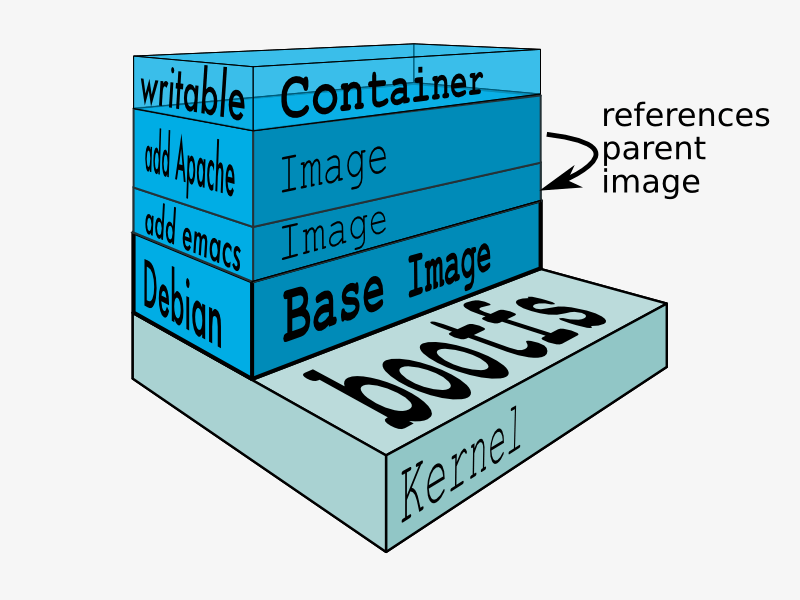

컨테이너라는 말을 듣고 어질어질한 설명을 듣고 난 다음 위와 같은 이미지까지 보고나면,  
고개를 끄덕인 다음에 외면해버리고 싶어집니다.  

기술적인 내용에 대한 설명은 다른 곳에서 얼마든지 찾을 수 있을 테니,  
초심자의 입장에서 머리속에 이미지가 잡힐 만한 설명을 해보자면..

"겁나 최적화된 가상 머신"이라고 일단 생각하시면 됩니다.  
(설명이 너무나 많은 배경지식들을 생략하고 있고, 정확하지 않은 단어로 설명되어 오해의 소지가 많음을 미리 밝힙니다.)  

그런데 우리가 알고 있던 버추얼박스와 같은 가상머신과는 좀 차이가 있는데, 그 점만 좀 알아보도록 하죠.

 <br><br>

### 기존 방식의 가상머신

기존에는 운영체제를 포함한 환경을 가상머신으로 만들었습니다. 이것은 익숙한 개념이죠?

VMware 혹은 VirtualBox 같은 것들이 그렇습니다.  

직관적으로 이해되고 사용성도 나쁘지 않았지만 무겁고 느렸습니다.

 <br><br>

### 컨테이너 개념의 도입

운영체제를 포함해서 가상머신을 만드는 방법의 한계인 속도를 개선하기 위해서 다른 아이디어가 등장했습니다.
바로 프로세스를 격리 하는 방식이 그것입니다.

우리가 컨테이너라고 부르는 개념이 바로 이건데요. 프로세스를 격리한다는게 어떻게 가상화로 이어지지? 라는 의문도 드실텐데,  
그 의문을 이해하는 것은 과감히 포기하고 오늘은 
>이렇게 하면 빠르고 가벼운데,  
>호스트 PC의 환경과 동작에 영향을 주지 않는다

라고만 이해하고 넘어가시면 됩니다.
  

컨테이너를 여러개 실행해도, 호스트에 영향을 미치지 않는 것 뿐만 아니라 컨테이너끼리도 영향없이 독립적으로 실행된다는 것이 핵심입니다.

CPU나 메모리 사용량을 제한할 수 있고 **호스트의 특정 포트와 연결**하거나 **호스트의 특정 디렉토리를 내부 디렉토리인 것처럼 사용**할 수도 있습니다.

 <br><br>

## 도커 활용: 이미지 >> 컨테이너

<img src="https://subicura.com/generated/assets/article_images/2017-01-19-docker-guide-for-beginners-1/docker-image-1000-a3fada0fd.webp" width="500">

도커에서 가장 중요한 개념은 컨테이너와 함께 이미지라는 개념입니다.

이미지는 컨테이너 실행에 필요한 파일과 설정값등을 포함하고 있는 것으로 상태값을 가지지 않고 변하지 않습니다(Immutable). 컨테이너는 이미지를 실행한 상태라고 볼 수 있고 추가되거나 변하는 값은 컨테이너에 저장됩니다. 같은 이미지에서 여러개의 컨테이너를 생성할 수 있고 컨테이너의 상태가 바뀌거나 컨테이너가 삭제되더라도 이미지는 변하지 않고 그대로 남아있습니다.

말그대로 이미지는 컨테이너를 실행하기 위한 모든 정보를 가지고 있기 때문에 더 이상 의존성 파일을 컴파일하고 이것저것 설치할 필요가 없습니다.  
이제 새로운 서버가 추가되면 미리 만들어 놓은 이미지를 다운받고 컨테이너를 생성만 하면 됩니다.  
한 서버에 여러개의 컨테이너를 실행할 수 있고, 수십, 수백, 수천대의 서버도 문제없습니다.  

도커 이미지는 Docker hub에 등록하거나 Docker Registry 저장소를 직접 만들어 관리할 수 있습니다. 현재 공개된 도커 이미지는 50만개가 넘고 Docker hub의 이미지 다운로드 수는 80억회에 이릅니다. 누구나 쉽게 이미지를 만들고 배포할 수 있습니다.

 <br><br>

## 윈도우 운영체제에서 도커 설치 방법

 <br><br>

### 도커 데스크탑 프로그램 다운로드

WSL2를 활성화 시키고 Docker Desktop을 다운로드 하고 설치하면 됩니다.(Docker Desktop을 먼저 설치하고  WSL2를 활성화 해도 큰 상관은 없습니다.)  

*도커 데스크탑 다운로드 링크:* https://docs.docker.com/desktop/windows/install/

 <br><br>

### WSL2 (Windows Subsystem For Linux 2)  설정

https://docs.microsoft.com/ko-kr/windows/wsl/install-manual#step-2---check-requirements-for-running-wsl-2

상기 링크 페이지의 내용대로 1 ~ 5단계를 수행하면 됩니다.  
간단한 과정이고, 보기 편하도록 아래에도 정리해 두었습니다.

 <br><br>

#### 1단계 - Linux용 Windows 하위 시스템 사용

Windows에서 Linux 배포를 설치하려면 먼저 "Linux용 Windows 하위 시스템" 옵션 기능을 사용하도록 설정합니다.

관리자 권한으로 PowerShell(혹은 CMD)을 열고 다음 명령을 입력합니다.

```PowerShell

dism.exe /online /enable-feature /featurename:Microsoft-Windows-Subsystem-Linux /all /norestart
```
이제 2단계로 이동하여 WSL 2로 업데이트하는 것이 좋습니다. 그러나 WSL 1만 설치하려면 이제 머신을 다시 시작하여 6단계 - 선택한 Linux 배포 설치로 이동할 수 있습니다. WSL 2로 업데이트하려면 머신이 다시 시작될 때까지 기다린 후 다음 단계로 이동합니다.

 <br><br>

#### 2단계 - WSL 2 실행을 위한 요구 사항 확인

WSL 2로 업데이트하려면 Windows 10을 실행해야 합니다.

- x64 시스템의 경우: 버전 1903 이상, 빌드 18362 이상
- ARM64 시스템의 경우: 버전 2004 이상, 빌드 19041 이상
- 18362보다 낮은 빌드는 WSL 2를 지원하지 않습니다. Windows Update Assistant를 사용하여 Windows 버전을 업데이트합니다.

버전 및 빌드 번호를 확인하려면 Windows 로고 키 + R을 선택하고, winver를 입력하고, 확인을 선택합니다. [설정] 메뉴에서 최신 Windows 버전으로 업데이트합니다.

 <br><br>

#### 3단계 - Virtual Machine 기능 사용

WSL 2를 설치하려면 먼저 Virtual Machine 플랫폼 옵션 기능을 사용하도록 설정해야 합니다. 이 기능을 사용하려면 머신에 가상화 기능이 필요합니다.

PowerShell을 관리자 권한으로 열어 실행합니다.

```PowerShell

dism.exe /online /enable-feature /featurename:VirtualMachinePlatform /all /norestart
```

머신을 다시 시작하여 WSL 설치를 완료하고 WSL 2로 업데이트합니다.

 <br><br>

#### 4단계 - Linux 커널 업데이트 패키지 다운로드

최신 패키지를 다운로드합니다.

[x64 머신용 최신 WSL2 Linux 커널 업데이트 패키지](https://wslstorestorage.blob.core.windows.net/wslblob/wsl_update_x64.msi)

>참고
>
>ARM64 머신을 사용하는 경우 ARM64 패키지를 대신 다운로드하세요. 사용하고 있는 머신의 종류를 잘 모르는 경우 명령 프롬프트 또는 PowerShell을 >열고 systeminfo | find "System Type"을 입력합니다. 주의: 비 영어 Windows 버전에서는 "시스템 유형" 문자열을 변환하여 검색 텍스트를 수정해>야 할 수 있습니다. find 명령에 대한 따옴표는 이스케이프해야 할 수도 있습니다. 예를 들어 독일어 systeminfo | find '"Systemtyp"'입니다.

이전 단계에서 다운로드한 업데이트 패키지를 실행합니다. (실행하려면 두 번 클릭 - 관리자 권한을 요구하는 메시지가 표시되면 '예'를 선택하여 이 설치를 승인합니다.)

설치가 완료되면 새 Linux 배포를 설치할 때 WSL 2를 기본 버전으로 설정하는 다음 단계로 이동합니다. (새 Linux 설치를 WSL 1로 설정하려면 이 단계를 건너뜁니다.)

 <br><br>

#### 5단계 - WSL 2를 기본 버전으로 설정

PowerShell을 열고 이 명령을 실행하여 새 Linux 배포를 설치할 때 WSL 2를 기본 버전으로 설정합니다.

```PowerShell

wsl --set-default-version 2
```

 <br><br>

## Docker hub  구경하기

https://hub.docker.com/  

상기 링크로 들어가면 수많은 사람들이 자신의 설치환경을 이미지로 만들어 공유하고 있습니다. 우리는 그중에 맘에드는 것을 받아서 사용하기만 하면 됩니다.

 <br><br>

## 도커이미지 받아서 컨테이너 구동하기: andrewwhitehouse/clojupyter-nodejs-docker:0.4.3

저는 andrewwhitehouse/clojupyter 라는 이미지를 가지고 주피터 노트북 실행하는 환경을 구성하는 법을 설명 드리겠습니다.  
밑의 내용을 그대로 따라하시기만 하면 됩니다!

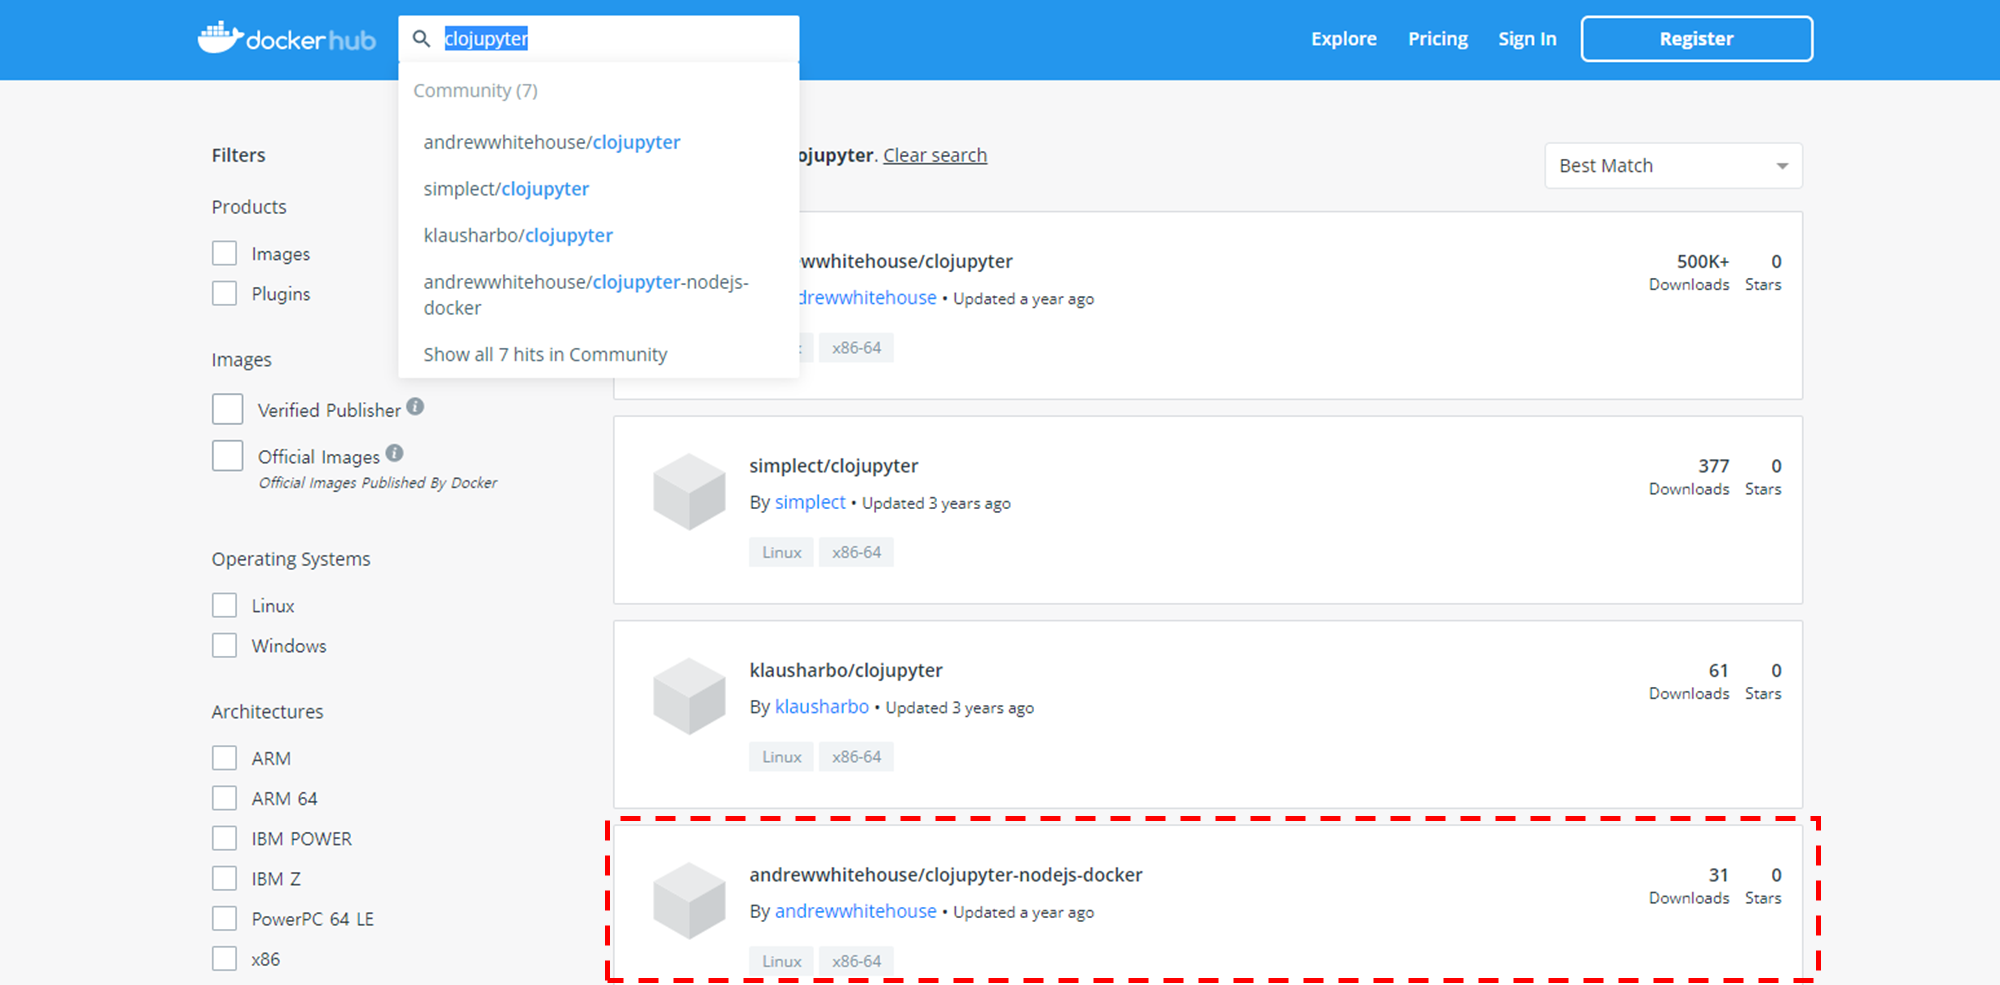

주피터노트북 설치환경 이미지 중에서 clojure와 nodejs, 그리고 python을 구동할 수 있는 이미지가 있습니다.

도커허브에서 clojupyter로 검색하면 이런 결과가 뜹니다.  
적색 상자 안이 pull 해서 실습해볼 대상 이미지 입니다.

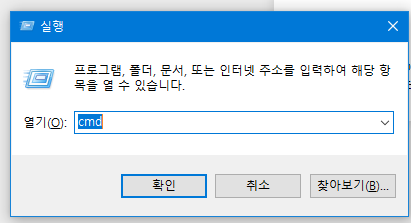

이제 window key + r key 를 눌러서 cmd 창을 열어줍니다.

하기 코드는 clojupyter 이미지를 Pull 하고 file 마운트 설정을 하는 배치파일 코드입니다. (최초 1회만 실행)

``` batch

docker run -it -d -p 8888:8888 -e GRANT_SUDO=yes --user root --name cljpt_sudo -v "c/dockervolume/cljpt_volume":"/home/jovyan/notebooks" andrewwhitehouse/clojupyter-nodejs-docker:0.4.3 jupyter notebook --allow-root --ip 0.0.0.0 --NotebookApp.token=''
start chrome \localhost:8888
```

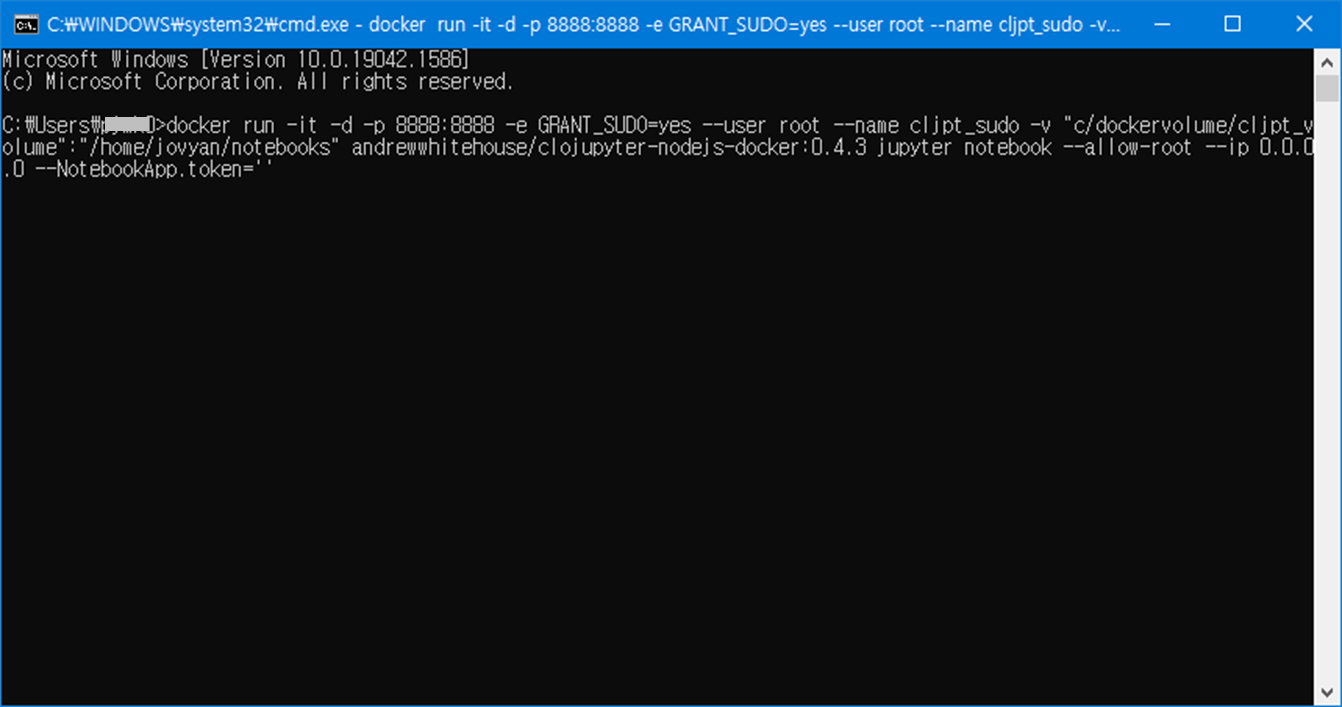

이렇게 CMD 창에 위 명령어를 입력하면

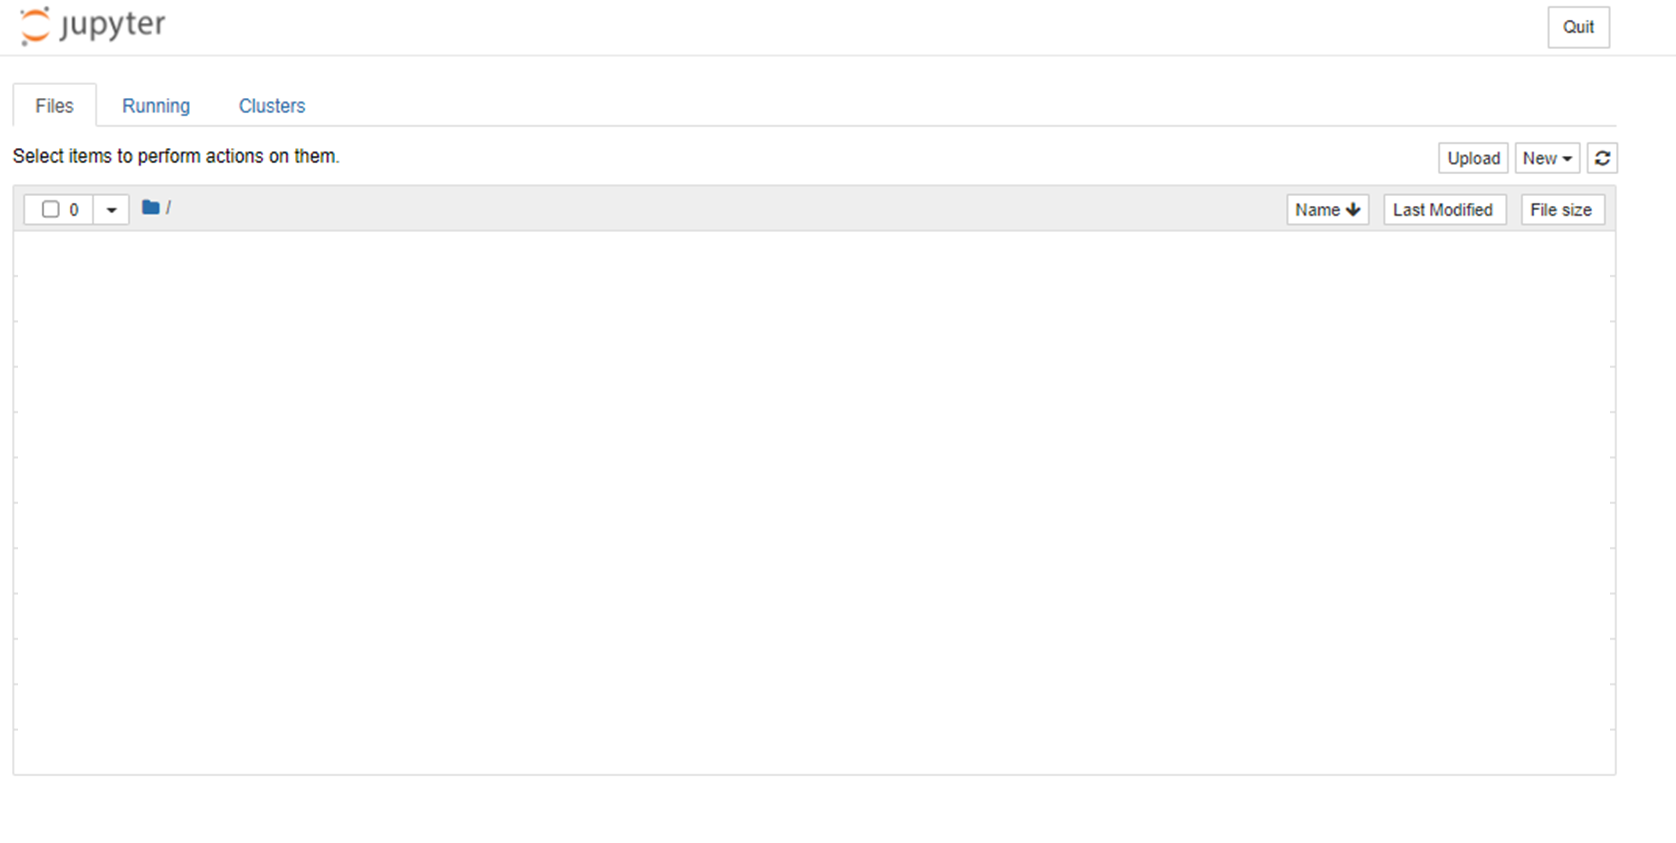

크롬이 실행되고 주피터 노트북이 자동으로 실행됩니다!!

이제 만들어진 컨테이너를 실행하는 코드입니다. 앞으로는 이 코드만 실행하면 됩니다.

``` batch
@echo off
docker start cljpt_sudo
start chrome \localhost:8888/
```

이 코드를 메모장에 붙여넣고 확장자를 .bat 로 저장하면,  
더블 클릭하여 주피터노트북이 설치된 도커 컨테이너를 실행할 수 있는 아이콘을 만들 수 있습니다 !!!